# Cifar-10 이미지 분류 - v2
- 데이터 부풀리기 적용

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# X_data: scaling
X_train = X_train/255.
X_test = X_test/255.

In [5]:
# y_data: one-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의/설정

In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [7]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                        

In [8]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model_path = 'best-cifar10-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

- 데이터 부풀리기

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X_train, Y_train, stratify=Y_train, test_size=0.2, random_state=seed
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5,
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

In [13]:
datagen.fit(X_train)

- 데이터 부풀리기 한 결과로 학습

In [14]:
hist = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_valid, Y_valid), epochs=100,
    callbacks=[mc,es]
)

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 1.9342 - accuracy: 0.2852
Epoch 1: val_loss improved from inf to 1.64167, saving model to best-cifar10-v2.h5
1250/1250 [==============================] - 39s 23ms/step - loss: 1.9342 - accuracy: 0.2852 - val_loss: 1.6417 - val_accuracy: 0.4080
Epoch 2/100
1249/1250 [============================>.] - ETA: 0s - loss: 1.6895 - accuracy: 0.3769
Epoch 2: val_loss improved from 1.64167 to 1.50596, saving model to best-cifar10-v2.h5
1250/1250 [==============================] - 24s 19ms/step - loss: 1.6896 - accuracy: 0.3769 - val_loss: 1.5060 - val_accuracy: 0.4541
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 1.5869 - accuracy: 0.4183
Epoch 3: val_loss improved from 1.50596 to 1.49591, saving model to best-cifar10-v2.h5
1250/1250 [==============================] - 24s 19ms/step - loss: 1.5869 - accuracy: 0.4183 - val_loss: 1.4959 - val_accuracy: 0.4521
Epoch 4/100
1248/1250 [==================

In [15]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8024 - accuracy: 0.7201


[0.8024306297302246, 0.7200999855995178]

- 학습과정 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_

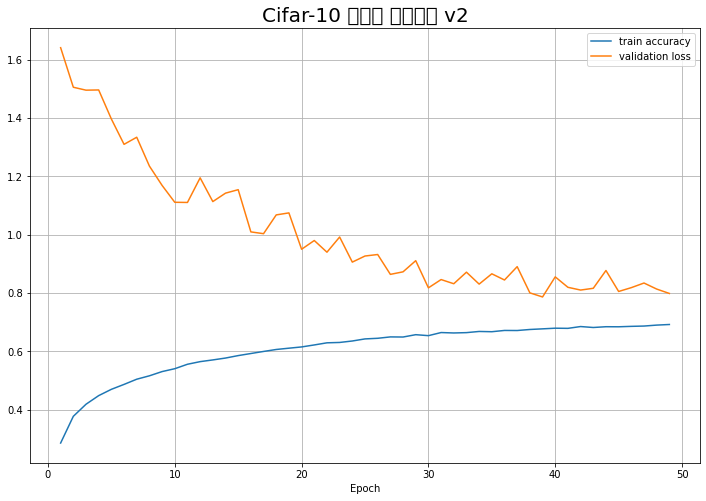

In [16]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize=(12,8))
plt.title('Cifar-10 데이터 부풀리기 v2', size=20)
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()